In [1]:
import numpy as np
import torch
import torchvision
from autoencoder import AutoEncoder
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import cv2

In [7]:
model_checkpoint_path = './model_checkpoints/exp-nonlin2-energyslider-substrate-chooser_120x120_backup/md_000000015000.pt'
grid_checkpoint_path = './model_checkpoints/exp-nonlin2-energyslider-substrate-chooser_120x120_backup/md_000000015000.grd'
#model = AutoEncoder(grid=None, num_em_steps=283)
model = AutoEncoder(grid=None, num_em_steps=283)
model.load_state_dict(torch.load(model_checkpoint_path))
grid_params = torch.load(grid_checkpoint_path)

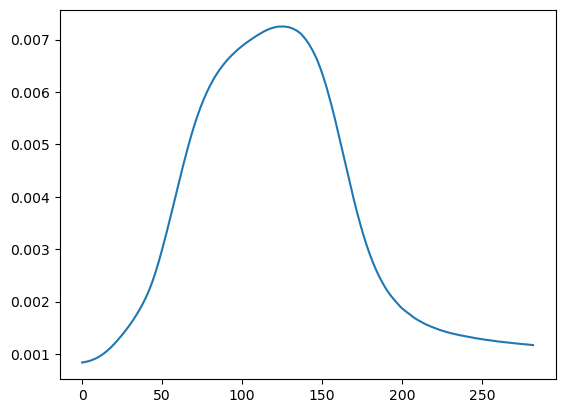

In [4]:
model.loss_step_weights
plt.plot(model.softmax(model.loss_step_weights).detach().numpy())
plt.show()

In [74]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
show(model.cc_activations[0].detach())

NameError: name 'model' is not defined

In [5]:
powers = np.exp(np.linspace(0.1, 3.0, 12))  - 1.0


In [6]:
powers

array([ 0.10517092,  0.43855101,  0.8724968 ,  1.43734441,  2.17258101,
        3.12960524,  4.3753204 ,  5.9968115 ,  8.10743314, 10.8547339 ,
       14.43077106, 19.08553692])

In [34]:
for idx, power in enumerate(powers):
    print('{0:03d}'.format(idx), '{0:06.3f}'.format(power))

000 00.105
001 00.439
002 00.872
003 01.437
004 02.173
005 03.130
006 04.375
007 05.997
008 08.107
009 10.855
010 14.431
011 19.086


In [14]:
def get_sorted_paths(directory_list, target_ext='.png'):
    path_list = []
    for directory in directory_list:
        paths = [join(directory,f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith(target_ext)]
        print(f'Found {len(paths)} files in {directory}')
        path_list += paths
    path_list.sort()
    return path_list

img_paths = get_sorted_paths(['./images/'])
amp_scalers = sorted(list(set([f.split('_')[1] for f in img_paths])))
em_steps = sorted(list(set([int(f.split('_')[2].split('.')[0][3:]) for f in img_paths])))

# Load one img
test_img = cv2.imread(img_paths[0])
print(test_img.shape)
big_img = np.zeros((test_img.shape[0]*len(amp_scalers),) + test_img.shape[1:])
print(big_img.shape)

Found 3396 files in ./images/
(124, 490, 3)
(1488, 490, 3)


In [15]:
# For every time step paste all versions in
for em_step in em_steps:
    img_list = []
    for scaler in amp_scalers[1:7]:
    #for scaler in [amp_scalers[3], amp_scalers[6]]:
        # Load the image:
        img_path = './images/img_{0}_idx{1}.png'.format(scaler, str(em_step).zfill(12))
        img = cv2.imread(img_path)
        img_list += [img.copy()]
        print(img_path)
    # Write out the big img
    big_img = np.concatenate(img_list, axis=0)
    print(big_img.shape)
    cv2.imwrite('./images/big_{0}.png'.format(str(em_step).zfill(12)), big_img)
    


./images/img_p00.439_idx000000000000.png
./images/img_p00.872_idx000000000000.png
./images/img_p01.437_idx000000000000.png
./images/img_p02.173_idx000000000000.png
./images/img_p03.130_idx000000000000.png
./images/img_p04.375_idx000000000000.png
(744, 490, 3)
./images/img_p00.439_idx000000000001.png
./images/img_p00.872_idx000000000001.png
./images/img_p01.437_idx000000000001.png
./images/img_p02.173_idx000000000001.png
./images/img_p03.130_idx000000000001.png
./images/img_p04.375_idx000000000001.png
(744, 490, 3)
./images/img_p00.439_idx000000000002.png
./images/img_p00.872_idx000000000002.png
./images/img_p01.437_idx000000000002.png
./images/img_p02.173_idx000000000002.png
./images/img_p03.130_idx000000000002.png
./images/img_p04.375_idx000000000002.png
(744, 490, 3)
./images/img_p00.439_idx000000000003.png
./images/img_p00.872_idx000000000003.png
./images/img_p01.437_idx000000000003.png
./images/img_p02.173_idx000000000003.png
./images/img_p03.130_idx000000000003.png
./images/img_p0

./images/img_p00.439_idx000000000043.png
./images/img_p00.872_idx000000000043.png
./images/img_p01.437_idx000000000043.png
./images/img_p02.173_idx000000000043.png
./images/img_p03.130_idx000000000043.png
./images/img_p04.375_idx000000000043.png
(744, 490, 3)
./images/img_p00.439_idx000000000044.png
./images/img_p00.872_idx000000000044.png
./images/img_p01.437_idx000000000044.png
./images/img_p02.173_idx000000000044.png
./images/img_p03.130_idx000000000044.png
./images/img_p04.375_idx000000000044.png
(744, 490, 3)
./images/img_p00.439_idx000000000045.png
./images/img_p00.872_idx000000000045.png
./images/img_p01.437_idx000000000045.png
./images/img_p02.173_idx000000000045.png
./images/img_p03.130_idx000000000045.png
./images/img_p04.375_idx000000000045.png
(744, 490, 3)
./images/img_p00.439_idx000000000046.png
./images/img_p00.872_idx000000000046.png
./images/img_p01.437_idx000000000046.png
./images/img_p02.173_idx000000000046.png
./images/img_p03.130_idx000000000046.png
./images/img_p0

./images/img_p00.439_idx000000000088.png
./images/img_p00.872_idx000000000088.png
./images/img_p01.437_idx000000000088.png
./images/img_p02.173_idx000000000088.png
./images/img_p03.130_idx000000000088.png
./images/img_p04.375_idx000000000088.png
(744, 490, 3)
./images/img_p00.439_idx000000000089.png
./images/img_p00.872_idx000000000089.png
./images/img_p01.437_idx000000000089.png
./images/img_p02.173_idx000000000089.png
./images/img_p03.130_idx000000000089.png
./images/img_p04.375_idx000000000089.png
(744, 490, 3)
./images/img_p00.439_idx000000000090.png
./images/img_p00.872_idx000000000090.png
./images/img_p01.437_idx000000000090.png
./images/img_p02.173_idx000000000090.png
./images/img_p03.130_idx000000000090.png
./images/img_p04.375_idx000000000090.png
(744, 490, 3)
./images/img_p00.439_idx000000000091.png
./images/img_p00.872_idx000000000091.png
./images/img_p01.437_idx000000000091.png
./images/img_p02.173_idx000000000091.png
./images/img_p03.130_idx000000000091.png
./images/img_p0

./images/img_p02.173_idx000000000132.png
./images/img_p03.130_idx000000000132.png
./images/img_p04.375_idx000000000132.png
(744, 490, 3)
./images/img_p00.439_idx000000000133.png
./images/img_p00.872_idx000000000133.png
./images/img_p01.437_idx000000000133.png
./images/img_p02.173_idx000000000133.png
./images/img_p03.130_idx000000000133.png
./images/img_p04.375_idx000000000133.png
(744, 490, 3)
./images/img_p00.439_idx000000000134.png
./images/img_p00.872_idx000000000134.png
./images/img_p01.437_idx000000000134.png
./images/img_p02.173_idx000000000134.png
./images/img_p03.130_idx000000000134.png
./images/img_p04.375_idx000000000134.png
(744, 490, 3)
./images/img_p00.439_idx000000000135.png
./images/img_p00.872_idx000000000135.png
./images/img_p01.437_idx000000000135.png
./images/img_p02.173_idx000000000135.png
./images/img_p03.130_idx000000000135.png
./images/img_p04.375_idx000000000135.png
(744, 490, 3)
./images/img_p00.439_idx000000000136.png
./images/img_p00.872_idx000000000136.png
.

./images/img_p00.439_idx000000000179.png
./images/img_p00.872_idx000000000179.png
./images/img_p01.437_idx000000000179.png
./images/img_p02.173_idx000000000179.png
./images/img_p03.130_idx000000000179.png
./images/img_p04.375_idx000000000179.png
(744, 490, 3)
./images/img_p00.439_idx000000000180.png
./images/img_p00.872_idx000000000180.png
./images/img_p01.437_idx000000000180.png
./images/img_p02.173_idx000000000180.png
./images/img_p03.130_idx000000000180.png
./images/img_p04.375_idx000000000180.png
(744, 490, 3)
./images/img_p00.439_idx000000000181.png
./images/img_p00.872_idx000000000181.png
./images/img_p01.437_idx000000000181.png
./images/img_p02.173_idx000000000181.png
./images/img_p03.130_idx000000000181.png
./images/img_p04.375_idx000000000181.png
(744, 490, 3)
./images/img_p00.439_idx000000000182.png
./images/img_p00.872_idx000000000182.png
./images/img_p01.437_idx000000000182.png
./images/img_p02.173_idx000000000182.png
./images/img_p03.130_idx000000000182.png
./images/img_p0

./images/img_p00.439_idx000000000219.png
./images/img_p00.872_idx000000000219.png
./images/img_p01.437_idx000000000219.png
./images/img_p02.173_idx000000000219.png
./images/img_p03.130_idx000000000219.png
./images/img_p04.375_idx000000000219.png
(744, 490, 3)
./images/img_p00.439_idx000000000220.png
./images/img_p00.872_idx000000000220.png
./images/img_p01.437_idx000000000220.png
./images/img_p02.173_idx000000000220.png
./images/img_p03.130_idx000000000220.png
./images/img_p04.375_idx000000000220.png
(744, 490, 3)
./images/img_p00.439_idx000000000221.png
./images/img_p00.872_idx000000000221.png
./images/img_p01.437_idx000000000221.png
./images/img_p02.173_idx000000000221.png
./images/img_p03.130_idx000000000221.png
./images/img_p04.375_idx000000000221.png
(744, 490, 3)
./images/img_p00.439_idx000000000222.png
./images/img_p00.872_idx000000000222.png
./images/img_p01.437_idx000000000222.png
./images/img_p02.173_idx000000000222.png
./images/img_p03.130_idx000000000222.png
./images/img_p0

./images/img_p00.439_idx000000000262.png
./images/img_p00.872_idx000000000262.png
./images/img_p01.437_idx000000000262.png
./images/img_p02.173_idx000000000262.png
./images/img_p03.130_idx000000000262.png
./images/img_p04.375_idx000000000262.png
(744, 490, 3)
./images/img_p00.439_idx000000000263.png
./images/img_p00.872_idx000000000263.png
./images/img_p01.437_idx000000000263.png
./images/img_p02.173_idx000000000263.png
./images/img_p03.130_idx000000000263.png
./images/img_p04.375_idx000000000263.png
(744, 490, 3)
./images/img_p00.439_idx000000000264.png
./images/img_p00.872_idx000000000264.png
./images/img_p01.437_idx000000000264.png
./images/img_p02.173_idx000000000264.png
./images/img_p03.130_idx000000000264.png
./images/img_p04.375_idx000000000264.png
(744, 490, 3)
./images/img_p00.439_idx000000000265.png
./images/img_p00.872_idx000000000265.png
./images/img_p01.437_idx000000000265.png
./images/img_p02.173_idx000000000265.png
./images/img_p03.130_idx000000000265.png
./images/img_p0

In [65]:
amp_scalers[1:7]

['p00.439', 'p00.872', 'p01.437', 'p02.173', 'p03.130', 'p04.375']

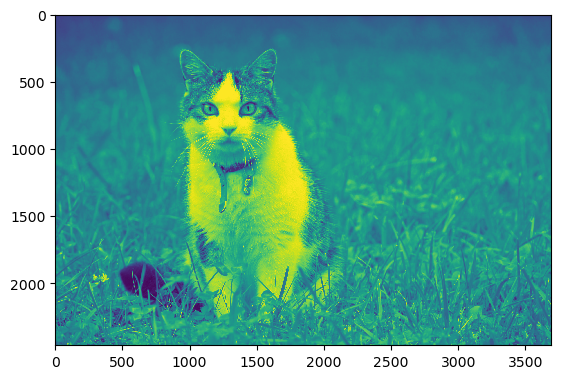

In [96]:
cat_img = cv2.imread('/home/bij/Downloads/cat.jpg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
plt.imshow(np.real(cat_img), interpolation='nearest')

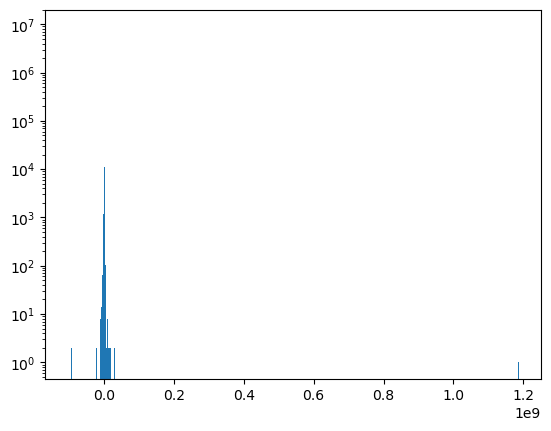

In [114]:
cat_img_fft = np.fft.fft2(cat_img)
plt.hist(np.real(cat_img_fft.reshape(-1)), bins=1000, log=True)
plt.show()

In [107]:

cat_img_fft_lpf = cat_img_fft.copy()
cat_img_fft_lpf[1000:, 1000:] = 0
print(np.real(cat_img_fft))

[[ 1.18639296e+09 -9.28464925e+07  4.61517412e+06 ...  1.00367142e+07
   4.61517412e+06 -9.28464925e+07]
 [-1.04262614e+08  1.86269457e+07 -1.41078994e+07 ... -1.21209613e+07
   3.58982420e+05  2.93912964e+07]
 [-1.65324956e+07  2.04130176e+06 -4.84174691e+06 ... -1.08651703e+07
  -1.45896950e+06 -1.26125336e+06]
 ...
 [ 1.47705834e+06 -1.94032629e+06 -8.42532892e+06 ...  1.97564046e+05
  -8.48528566e+06  9.74259583e+06]
 [-1.65324956e+07 -1.26125336e+06 -1.45896950e+06 ... -7.10124395e+06
  -4.84174691e+06  2.04130176e+06]
 [-1.04262614e+08  2.93912964e+07  3.58982420e+05 ...  1.15206010e+07
  -1.41078994e+07  1.86269457e+07]]


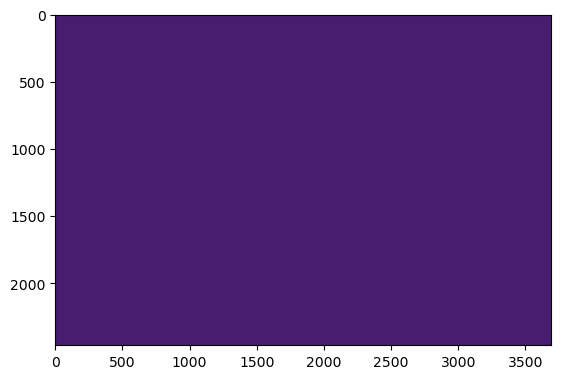

In [105]:
plt.imshow(np.real(cat_img_fft), interpolation='nearest')

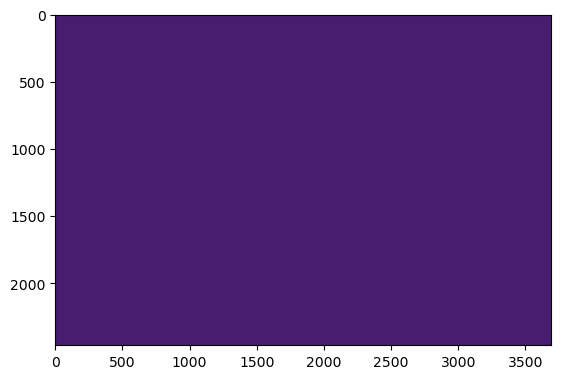

In [101]:
plt.imshow(np.real(cat_img_fft_lpf), interpolation='nearest')

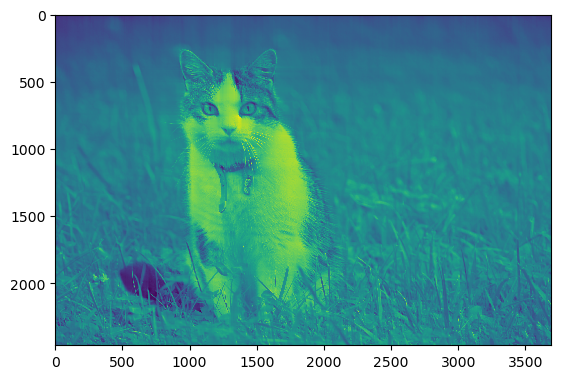

In [102]:
cat_img_lpf = np.fft.ifft2(cat_img_fft_lpf)
plt.imshow(np.real(cat_img_lpf), interpolation='nearest')

In [111]:
np.real(cat_img_fft.reshape(-1))

array([ 1.18639296e+09, -9.28464925e+07,  4.61517412e+06, ...,
        1.15206010e+07, -1.41078994e+07,  1.86269457e+07])

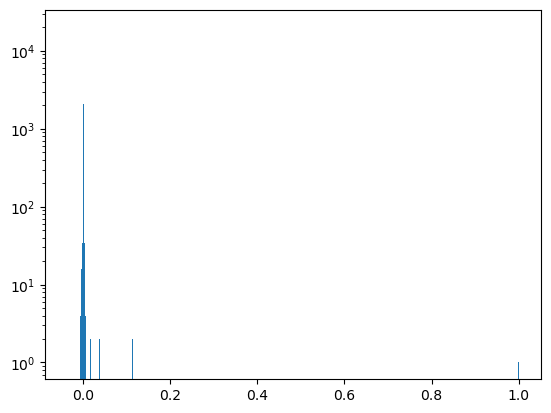

In [146]:
# There and back
cat_img = cv2.imread('/home/bij/Downloads/cat2.jpg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
cat_img_fft = np.fft.fft2(cat_img)
#cat_img_fft[10:, 10:] = 0
cat_img_back = np.fft.ifft2(cat_img_fft)
#plt.imshow(np.real(cat_img_fft/np.max(cat_img_fft)), interpolation='nearest')
#plt.imshow(np.real(cat_img_back), interpolation='nearest')
plt.hist(np.real(cat_img_fft.reshape(-1)/np.max(cat_img_fft)), bins=2000, log=True)
plt.show()

254.99999999999991

In [139]:
np.real(cat_img_fft)/np.mean(np.real(cat_img_fft))

array([[ 2.08971765e+04,  2.36492814e+03,  2.18254134e+02, ...,
        -1.32526864e+02,  2.18254134e+02,  2.36492814e+03],
       [ 7.78898721e+02,  1.27687582e+02, -1.51816470e+02, ...,
         3.50915125e+02, -2.35723375e+02, -7.52423260e+02],
       [ 7.00212088e+02, -4.50463367e+02,  1.39876773e+02, ...,
         2.43295036e+02, -5.16752674e+01, -1.70749030e+02],
       ...,
       [ 3.07382104e+02, -3.71953867e+01, -2.71013940e+02, ...,
        -7.63225907e+01,  1.62731197e+00, -1.68606776e+02],
       [ 7.00212088e+02, -1.70749030e+02, -5.16752674e+01, ...,
        -3.36314441e+02,  1.39876773e+02, -4.50463367e+02],
       [ 7.78898721e+02, -7.52423260e+02, -2.35723375e+02, ...,
        -1.48630305e+02, -1.51816470e+02,  1.27687582e+02]])

In [18]:
def get_sorted_paths(directory_list, target_ext='.png'):
    path_list = []
    for directory in directory_list:
        paths = [join(directory,f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith(target_ext)]
        print(f'Found {len(paths)} files in {directory}')
        path_list += paths
    path_list.sort()
    return path_list

img_paths = get_sorted_paths(['./optical_illusions/'])
for img_file in img_paths:
    img = cv2.imread(img_file)
    img = cv2.resize(img, (120,120))
    print(img.shape)

Found 4 files in ./optical_illusions/
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)


In [22]:
grid_params['cc_substrate'].shape

KeyError: 'cc_substrate'

In [28]:
grid_params[4].shape

torch.Size([120, 120, 1, 3, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


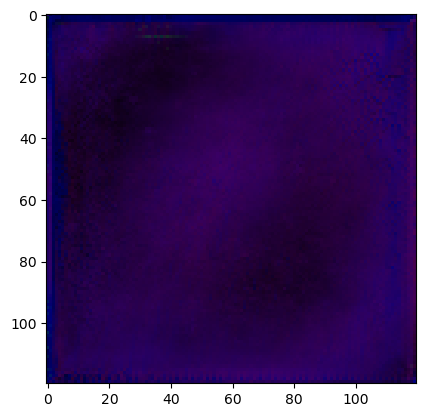

In [8]:
plt.imshow(grid_params[4].detach().numpy()[:, :, 0, :, 2], interpolation='nearest')

(array([2.9000e+01, 1.1430e+03, 8.7980e+03, 5.3035e+04, 2.6268e+04,
        1.6107e+04, 1.4195e+04, 7.4640e+03, 2.2660e+03, 2.9500e+02]),
 array([-0.3248462 , -0.2170746 , -0.10930299, -0.00153138,  0.10624022,
         0.21401183,  0.32178343,  0.42955504,  0.53732664,  0.64509825,
         0.75286985]),
 <BarContainer object of 10 artists>)

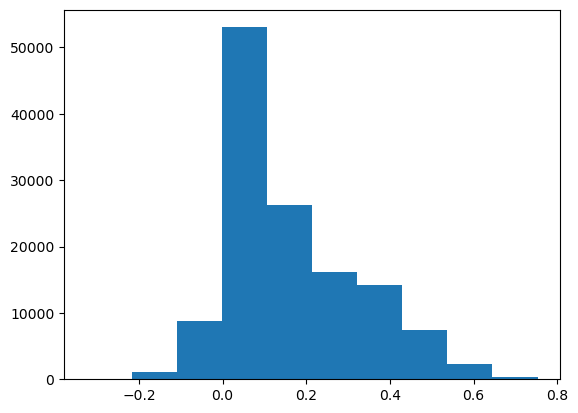

In [9]:
plt.hist(np.reshape(grid_params[4].detach().numpy(), (-1)))

In [12]:
inverse_perm = grid_params[4]
print(inverse_perm.shape)
#resizer = torchvision.transforms.Resize((600,600), interpolation=torchvision.transforms.InterpolationMode.BILINEAR)
torch.nn.functional.interpolate(inverse_perm, (600,600))
#resizer(inverse_perm)

torch.Size([120, 120, 1, 3, 3])


ValueError: Input and output must have the same number of spatial dimensions, but got input with with spatial dimensions of [1, 3, 3] and output size of (600, 600). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [50]:
def get_sorted_paths(directory_list, target_ext='.png'):
    path_list = []
    for directory in directory_list:
        paths = [join(directory,f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith(target_ext)]
        print(f'Found {len(paths)} files in {directory}')
        path_list += paths
    path_list.sort()
    return path_list

img_paths = get_sorted_paths(['./images/'])

# For every time step paste all versions in
for idx, img_path in enumerate(img_paths):
    img = cv2.imread(img_path)
    iw, ih = img.shape[0:2]
    # Write out the big img
    img_upscaled = cv2.resize(img, (ih*4,iw*4), interpolation=cv2.INTER_NEAREST)
    print(img.shape, img_upscaled.shape)
    cv2.imwrite('./images/upscaled_{0}.png'.format(str(idx).zfill(12)), img_upscaled)
    



Found 1132 files in ./images/
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3)

(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) 

(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) 

(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) (496, 1960, 3)
(124, 490, 3) 

In [37]:
k = torch.ones(3,3) / 8
k[1,1] = -1.0
print(k.shape)
k

torch.Size([3, 3])


tensor([[ 0.1250,  0.1250,  0.1250],
        [ 0.1250, -1.0000,  0.1250],
        [ 0.1250,  0.1250,  0.1250]])

In [41]:
lpconv = torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding='valid', bias=None)

print(lpconv.weight)
print(lpconv.weight.shape)
lpconv.weight = torch.nn.Parameter(k[None,None,...])
lpconv.weight.requires_grad = False
print(lpconv.weight)
print(lpconv.weight.shape)

Parameter containing:
tensor([[[[ 0.0719,  0.1207, -0.0211],
          [ 0.1816, -0.2517,  0.1436],
          [-0.1530,  0.0629, -0.0953]]]], requires_grad=True)
torch.Size([1, 1, 3, 3])
Parameter containing:
tensor([[[[ 0.1250,  0.1250,  0.1250],
          [ 0.1250, -1.0000,  0.1250],
          [ 0.1250,  0.1250,  0.1250]]]])
torch.Size([1, 1, 3, 3])


In [51]:
img = torch.ones(1,1,5,5)
img[..., 3,3] = 2
print(img)
pot = lpconv(img)
pot = pot**2
torch.sum(pot)

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 2., 1.],
          [1., 1., 1., 1., 1.]]]])


tensor(1.0469)

In [40]:
torch.sum(lpconv.weight*torch.ones_like(lpconv.weight))

tensor(0.)

In [58]:
# Make a conv kernel that calculates the total energy stored in the field. 
k = torch.ones(3,3) / 8
k[1,1] = -1.0
lpconv = torch.nn.Conv2d(1, 1, kernel_size=3, stride=1, padding='valid', bias=None)
lpconv.weight = torch.nn.Parameter(k[None,None,...])
lpconv.weight.requires_grad = False
img = torch.ones(1,1,5,5)
img[..., 3,3] = -0.2
pot = lpconv(img)
pot = pot**2
torch.sum(pot)

tensor(1.5075)

In [2]:
def upscale2x(tensor, spat_dims):
    '''
    Upscales a tensor by doubling the resolution in each spatial dimension.
    Inputs: 
        tensor - the data to be upscaled.
        spat_dims - the spatial dimensions that will grow to 2x their original.
    '''
    new_shape = tensor.shape
    new_shape[spat_dims] *= 2
    tensor_upscaled = torch.zeros(new_shape)
    

In [13]:
x = torch.ones(2,3,4)
print(x.shape)
print(x)
x.repeat(4,2,1).shape

torch.Size([2, 3, 4])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


torch.Size([8, 6, 4])

In [19]:
#x = torch.ones(60,60,3,3)
x = torch.ones(60)
reps = torch.ones(len(x.shape), dtype=int)
for i in range(len(reps)):
    reps[i] = 2
    if(i >= 1):
        break

print(x.shape)
print(reps)
x.repeat(tuple(reps)).shape

torch.Size([60])
tensor([2])


torch.Size([120])

In [37]:
torch.nn.functional.interpolate(torch.arange(1, 11, dtype=float)[None, None, ...], (20))

tensor([[[ 1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.,
           8.,  8.,  9.,  9., 10., 10.]]], dtype=torch.float64)

In [28]:
torch.arange(10, dtype=float)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)

In [36]:
torch.ones(3).shape == torch.ones(3,3).shape

False